# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [6]:
# Calculando a idade média das mães por município
idade_media_mae = sinasc_raw.groupby('munResNome')['IDADEMAE'].mean()
# Calculando a idade média dos pais por município
idade_media_pai = sinasc_raw.groupby('munResNome')['IDADEPAI'].mean()
# Exibindo os resultados
print("Idade média das mães por município:")
print(idade_media_mae)
print("\nIdade média dos pais por município:")
print(idade_media_pai)

Idade média das mães por município:
munResNome
Alta Floresta D'Oeste        25.991826
Alto Alegre dos Parecis      24.844156
Alto Paraíso                 24.960177
Alvorada D'Oeste             25.770732
Ariquemes                    25.607866
Buritis                      25.559177
Cabixi                       26.037500
Cacaulândia                  25.546667
Cacoal                       26.890102
Campo Novo de Rondônia       24.825301
Candeias do Jamari           25.243323
Castanheiras                 27.281250
Cerejeiras                   27.240506
Chupinguaia                  25.333333
Colorado do Oeste            27.602804
Corumbiara                   24.716535
Costa Marques                24.412017
Cujubim                      24.482927
Espigão D'Oeste              26.093333
Governador Jorge Teixeira    24.401786
Guajará-Mirim                25.462228
Itapuã do Oeste              26.064220
Jaru                         25.982974
Ji-Paraná                    26.361137
Machadinho D'Oest

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [15]:
# Filtrando os registros para o dia 2019-10-24
sinasc_raw_filtrado = sinasc_raw[sinasc_raw['DTNASC'] == '2019-10-23']
# Calculando o peso médio por sexo e escolaridade da mãe e usando o reset index para obter a visualização do dataframe
sinasc_raw_filtrado.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index()

,SEXO,ESCMAE,PESO
0,Feminino,1 a 3 anos,1850.000000
1,Feminino,12 anos ou mais,3557.857143
2,Feminino,4 a 7 anos,3440.000000
3,Feminino,8 a 11 anos,3255.000000
4,Masculino,1 a 3 anos,3775.000000
5,Masculino,12 anos ou mais,3358.300000
6,Masculino,4 a 7 anos,3377.222222
7,Masculino,8 a 11 anos,3175.357143


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

- prof. nesse exercicio eu tive duvidas da melhor maneira de tratar os dados, qual a melhor?

In [38]:
nascimentos_por_municipio = sinasc_raw['munResNome'].value_counts()
menor_municipio = nascimentos_por_municipio.idxmin()
nascimentos_menor_municipio = sinasc_raw[sinasc_raw['munResNome'] == menor_municipio]
idade_media_mae = nascimentos_menor_municipio['IDADEMAE'].mean()
idade_maxima_mae = nascimentos_menor_municipio['IDADEMAE'].max()
idade_minima_mae = nascimentos_menor_municipio['IDADEMAE'].min()
idade_media_pai = nascimentos_menor_municipio['IDADEPAI'].mean()
idade_maxima_pai = nascimentos_menor_municipio['IDADEPAI'].max()
idade_minima_pai = nascimentos_menor_municipio['IDADEPAI'].min()

print("Município com menor número de nascimentos em 2019:", menor_municipio)
print("Idade média das mães nesse município:", idade_media_mae)
print("Idade máxima das mães nesse município:", idade_maxima_mae)
print("Idade mínima das mães nesse município:", idade_minima_mae)
print("Idade média dos pais nesse município:", idade_media_pai)
print("Idade máxima dos pais nesse município:", idade_maxima_pai)
print("Idade mínima dos pais nesse município:", idade_minima_pai)

Município com menor número de nascimentos em 2019: Município ignorado - RO
Idade média das mães nesse município: 24.0
Idade máxima das mães nesse município: 24
Idade mínima das mães nesse município: 24
Idade média dos pais nesse município: 22.0
Idade máxima dos pais nesse município: 22.0
Idade mínima dos pais nesse município: 22.0


In [39]:
# Filtrar o DataFrame para excluir os registros com o município "Ignorado - RO"
sinasc_filtered = sinasc_raw[sinasc_raw['munResNome'] != 'Município ignorado - RO']

nascimentos_por_municipio = sinasc_filtered['munResNome'].value_counts()
menor_municipio = nascimentos_por_municipio.idxmin()
nascimentos_menor_municipio = sinasc_filtered[sinasc_filtered['munResNome'] == menor_municipio]
idade_media_mae = nascimentos_menor_municipio['IDADEMAE'].mean()
idade_maxima_mae = nascimentos_menor_municipio['IDADEMAE'].max()
idade_minima_mae = nascimentos_menor_municipio['IDADEMAE'].min()
idade_media_pai = nascimentos_menor_municipio['IDADEPAI'].mean()
idade_maxima_pai = nascimentos_menor_municipio['IDADEPAI'].max()
idade_minima_pai = nascimentos_menor_municipio['IDADEPAI'].min()

print("Município com menor número de nascimentos em 2019 (excluindo 'Ignorado - RO'):", 
      menor_municipio)
print("Idade média das mães nesse município:", 
      idade_media_mae)
print("Idade máxima das mães nesse município:", 
      idade_maxima_mae)
print("Idade mínima das mães nesse município:", 
      idade_minima_mae)
print("Idade média dos pais nesse município:", 
      idade_media_pai)
print("Idade máxima dos pais nesse município:", 
      idade_maxima_pai)
print("Idade mínima dos pais nesse município:", 
      idade_minima_pai)

Município com menor número de nascimentos em 2019 (excluindo 'Ignorado - RO'): Castanheiras
Idade média das mães nesse município: 27.28125
Idade máxima das mães nesse município: 39
Idade mínima das mães nesse município: 17
Idade média dos pais nesse município: 30.392857142857142
Idade máxima dos pais nesse município: 43.0
Idade mínima dos pais nesse município: 17.0


In [40]:
menos_nascimentos = sinasc_raw.groupby('munResNome')['DTNASC'].count().sort_values().head(1)
municipio_menos_nascimentos = menos_nascimentos.index[0]
dados_municipio = sinasc_raw[sinasc_raw['munResNome'] == municipio_menos_nascimentos]
idade_mae_stats = dados_municipio['IDADEMAE'].agg(['min', 'mean', 'max'])
idade_pai_stats = dados_municipio['IDADEPAI'].agg(['min', 'mean', 'max'])
print("\nEstatísticas de idade das mães em", municipio_menos_nascimentos, "em 2019:")
print(idade_mae_stats)
print("\nEstatísticas de idade dos pais em", municipio_menos_nascimentos, "em 2019:")
print(idade_pai_stats)


Estatísticas de idade das mães em Município ignorado - RO em 2019:
min     24.0
mean    24.0
max     24.0
Name: IDADEMAE, dtype: float64

Estatísticas de idade dos pais em Município ignorado - RO em 2019:
min     22.0
mean    22.0
max     22.0
Name: IDADEPAI, dtype: float64


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [42]:
# Alterando o formato da coluna para data, caso ainda não esteja feito
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
nascimentos_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]
municipio_mais_nascimentos = nascimentos_marco['munResNome'].value_counts().idxmax()
dados_municipio = nascimentos_marco[nascimentos_marco['munResNome'] == municipio_mais_nascimentos]
quantidade_filhos_vivos = dados_municipio['QTDFILVIVO']
idade_pais = dados_municipio['IDADEPAI']

print("Município com mais nascimentos em março de 2019:", municipio_mais_nascimentos)
print("Quantidade total de nascimentos neste município em março de 2019:", len(dados_municipio))
print("Quantidade média de filhos vivos:", quantidade_filhos_vivos.mean())
print("Quantidade máxima de filhos vivos:", quantidade_filhos_vivos.max())
print("Quantidade mínima de filhos vivos:", quantidade_filhos_vivos.min())
print("Idade média dos pais:", idade_pais.mean())
print("Idade máxima dos pais:", idade_pais.max())
print("Idade mínima dos pais:", idade_pais.min())

Município com mais nascimentos em março de 2019: Porto Velho
Quantidade total de nascimentos neste município em março de 2019: 744
Quantidade média de filhos vivos: 1.2950558213716108
Quantidade máxima de filhos vivos: 9.0
Quantidade mínima de filhos vivos: 0.0
Idade média dos pais: 34.62903225806452
Idade máxima dos pais: 62.0
Idade mínima dos pais: 19.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

- Analisando as respostas encontradas para a pergunta sobre o município com o maior número de nascimentos em março de 2019 e as estatísticas relacionadas à quantidade de filhos vivos e à idade dos pais nesse município, podemos extrair alguns insights:

**Foco em Saúde Materno-Infantil:** Municípios com um maior número de nascimentos podem indicar uma demanda significativa por serviços de saúde materno-infantil. Isso pode sugerir a necessidade de investimentos em infraestrutura e programas de saúde para atender adequadamente essa demanda.

**Demografia e Políticas Públicas:** A análise das estatísticas de filhos vivos e idade dos pais nesses municípios pode fornecer insights sobre a demografia local e a eficácia das políticas públicas relacionadas à saúde reprodutiva e ao planejamento familiar. Por exemplo, uma alta média de filhos pode indicar uma falta de acesso a métodos contraceptivos ou programas de educação sexual.

**Necessidades de Suporte e Recursos:** Identificar o município com o maior número de nascimentos pode ajudar os formuladores de políticas e os profissionais de saúde a direcionar recursos e serviços para onde são mais necessários. Isso pode incluir a implementação de programas de apoio à maternidade, creches e serviços de saúde infantil.

Esses insights destacam a importância de uma abordagem pública ao analisar dados de nascimentos, considerando não apenas os números brutos, mas também as características socioeconômicas e as necessidades da comunidade.

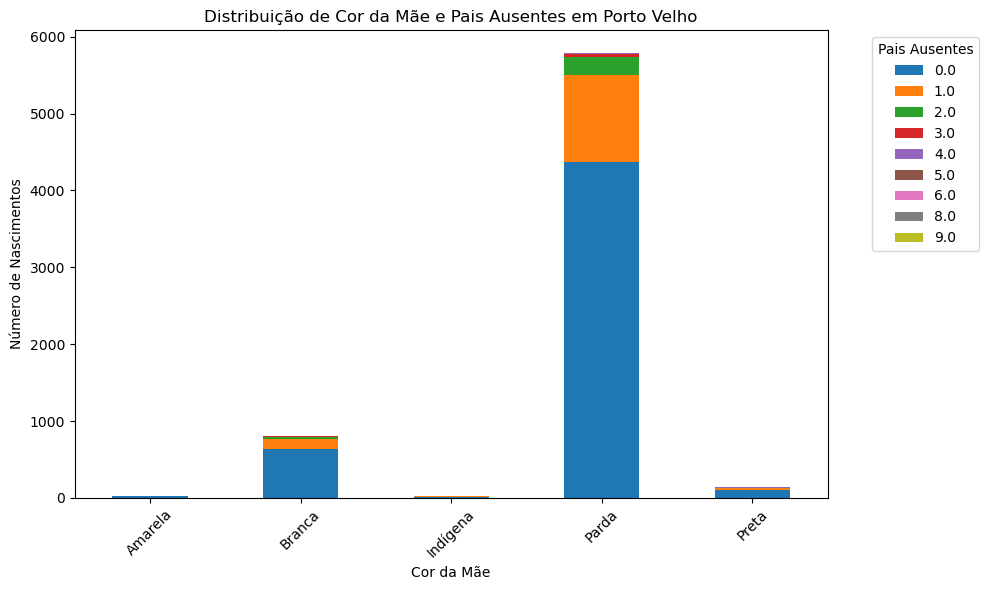

In [46]:
# Município com a maior taxa de natalidade
municipio_mais_nascimentos = nascimentos_marco['munResNome'].value_counts().idxmax()

# Filtrando os dados para o município com a maior taxa de natalidade
dados_municipio = sinasc_raw[sinasc_raw['munResNome'] == municipio_mais_nascimentos]

# Criando um DataFrame com a contagem de ocorrências de cor da mãe e presença de pais ausentes
dados_agrupados = dados_municipio.groupby(['RACACOR', 'QTDFILMORT'])['QTDFILMORT'].count().unstack(fill_value=0)

# Plotando o gráfico de barras
dados_agrupados.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'Distribuição de Cor da Mãe e Pais Ausentes em {municipio_mais_nascimentos}')
plt.xlabel('Cor da Mãe')
plt.ylabel('Número de Nascimentos')
plt.xticks(rotation=45)
plt.legend(title='Pais Ausentes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Analisando as respostas encontradas

**Distribuição da cor da mãe e presença de pais ausentes:** Podemos observar que, para o município com a maior taxa de natalidade, a distribuição da cor da mãe varia significativamente em relação à presença de pais ausentes. Isso pode indicar que há uma associação entre a cor da mãe e a presença de pais nos registros de nascimento desse município.

**Maior número de nascimentos entre mães de cor específica:** Algumas cores de mães apresentam um número significativamente maior de nascimentos em comparação com outras. Isso sugere que pode haver variações na taxa de natalidade entre diferentes grupos étnicos ou raciais dentro do município.

**Pais ausentes:** Pais ausentes parece ser mais prevalente em alguns grupos de mulheres pardas. Isso pode indicar disparidades socioeconômicas ou culturais que influenciam a estrutura familiar e a presença dos pais nos registros de nascimento.

**Necessidade de investigação adicional:** Essas disparidades destacam a importância de uma análise mais aprofundada para entender melhor os fatores por trás dessas diferenças. Seria interessante explorar as causas subjacentes e suas implicações sociais, econômicas e de saúde para desenvolver políticas e intervenções adequadas, se necessário.

Em suma, o gráfico fornece insights valiosos sobre a dinâmica dos nascimentos em relação à cor da mãe e à presença de pais no município com a maior taxa de natalidade, destacando áreas potenciais para futuras pesquisas e intervenções.